### Spectral Clustering - KNeighors Graph

In [1]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import spectral_embedding
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Read pitching pickle files

In [2]:
pitching = pd.read_pickle("./analysisdata/pitching.pkl")
pitchingScaled = pd.read_pickle("./analysisdata/pitchingScaled.pkl")

print(pitching.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 0 to 19117
Data columns (total 37 columns):
stint             14473 non-null int64
W                 14473 non-null int64
L                 14473 non-null int64
G                 14473 non-null int64
GS                14473 non-null int64
CG                14473 non-null int64
SHO               14473 non-null int64
SV                14473 non-null int64
IPouts            14473 non-null int64
H                 14473 non-null int64
ER                14473 non-null int64
HR                14473 non-null int64
BB                14473 non-null int64
SO                14473 non-null int64
BAOpp             14473 non-null float64
ERA               14473 non-null float64
IBB               14473 non-null float64
WP                14473 non-null int64
HBP               14473 non-null float64
BK                14473 non-null int64
BFP               14473 non-null float64
GF                14473 non-null int64
R                 14473

#### Data Preprocessing

In [3]:
#Save pitcher IDs for potential post clustering analysis
pitchIDs = pitching[['yearID', 'playerID', 'salary', 'adjSalary2']]
#print(pitchIDs)

#One Hot Encoding for throws
tmp_df = pd.get_dummies(pitching.throws,prefix='throws')
pitchingSC = pd.concat((pitching,tmp_df),axis=1) # add back into the dataframe

#Drop Throws after one-hot encoding
#Drop Attributes no longer needed (MinSalaries, adjMinSalaries, adjSalary, playerID, bats, stint
pitchingSC = pitchingSC.drop(['salary', 'MinSalaries', 'adjMinSalaries', 'adjSalary', 'adjSalary2', 'playerID', 'bats', 'stint', 'throws'], axis=1)

print(pitchingSC.head())
print(pitchingSC.info())
print(pitchingSC.shape)

    W   L   G  GS  CG  SHO  SV  IPouts    H   ER    ...       R   SH   SF  \
0  10   6  54   0   0    0  14     264   83   37    ...      44  5.0  3.0   
2   7   2  61   0   0    0  10     259   86   31    ...      35  1.0  2.0   
3   4   3  54   0   0    0   1     181   45   24    ...      27  3.0  3.0   
4  10   7  21  19   2    0   0     367  118   44    ...      49  7.0  4.0   
5  17  10  36  36   6    1   0     782  268  100    ...     105  6.0  3.0   

   GIDP  weight  height  yearID  throws_L  throws_R  throws_S  
0  13.0   190.0    75.0    1985         0         1         0  
2  16.0   210.0    74.0    1985         0         1         0  
3   4.0   190.0    74.0    1985         1         0         0  
4   8.0   195.0    76.0    1985         0         1         0  
5  15.0   190.0    75.0    1985         0         1         0  

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 0 to 19117
Data columns (total 31 columns):
W           14473 non

##### ERA Outliers

In [14]:
print(pitchingSC.ERA.describe())
pitchingSC = pitchingSC[pitchingSC.ERA < 10]
pitchingSC = pitchingSC[pitchingSC.yearID > 2016]

count    1026.000000
mean        4.501735
std         1.674394
min         0.000000
25%         3.342500
50%         4.275000
75%         5.365000
max         9.970000
Name: ERA, dtype: float64


#### KNeighbors Graph

##### Laplacian Graph

#### Train and Adjust Parameters

507


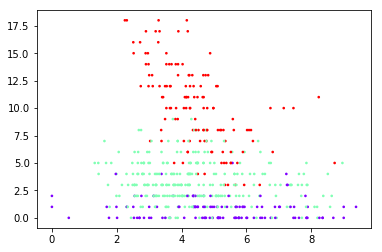

In [18]:
X = pitchingSC.iloc[:,0:31].values
nclust = 3
Xknn = kneighbors_graph(X, 10)

spcKNG = SpectralClustering(n_clusters=nclust, affinity = 'precomputed')

labels = spcKNG.fit_predict(Xknn)
print(len(labels))

plt.scatter(X[:, 14], X[:, 0], c=labels, cmap=plt.cm.rainbow, s=7, linewidths=0)

plt.show()

#### Visualize Results

In [19]:
print(spcKNG.affinity_matrix_)
print(spcKNG.labels_)

  (0, 273)	1.0
  (0, 470)	1.0
  (0, 89)	1.0
  (0, 90)	1.0
  (0, 495)	1.0
  (0, 53)	1.0
  (0, 208)	1.0
  (0, 292)	1.0
  (0, 425)	1.0
  (0, 33)	1.0
  (1, 421)	1.0
  (1, 40)	1.0
  (1, 482)	1.0
  (1, 341)	1.0
  (1, 363)	1.0
  (1, 184)	1.0
  (1, 396)	1.0
  (1, 433)	1.0
  (1, 157)	1.0
  (1, 100)	1.0
  (2, 479)	1.0
  (2, 266)	1.0
  (2, 323)	1.0
  (2, 312)	1.0
  (2, 281)	1.0
  :	:
  (504, 110)	1.0
  (504, 278)	1.0
  (504, 153)	1.0
  (504, 132)	1.0
  (504, 0)	1.0
  (505, 162)	1.0
  (505, 42)	1.0
  (505, 345)	1.0
  (505, 289)	1.0
  (505, 146)	1.0
  (505, 268)	1.0
  (505, 248)	1.0
  (505, 269)	1.0
  (505, 481)	1.0
  (505, 78)	1.0
  (506, 307)	1.0
  (506, 451)	1.0
  (506, 472)	1.0
  (506, 427)	1.0
  (506, 305)	1.0
  (506, 208)	1.0
  (506, 90)	1.0
  (506, 126)	1.0
  (506, 250)	1.0
  (506, 61)	1.0
[1 2 1 0 1 1 1 0 1 0 2 1 1 0 2 0 2 1 1 1 0 1 1 0 1 1 1 1 1 0 2 0 1 1 1 0 1
 1 2 1 2 1 2 1 1 1 1 1 1 0 1 0 2 1 1 0 0 1 0 0 1 0 0 2 1 0 0 1 1 0 2 0 1 1
 2 0 0 2 2 1 1 0 1 0 2 1 1 2 2 1 1 1 2 2 1 2 0 1 2 2 2 